<a href="https://colab.research.google.com/github/MohammadNPak/MFTDjango04/blob/master/ExteraHWQ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/NNDL/HWExtera/Q1/archive.zip -d ./dataset

Archive:  /content/drive/MyDrive/NNDL/HWExtera/Q1/archive.zip
  inflating: ./dataset/creditcard.csv  


In [4]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 225 kB 32.4 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [3]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_csv = pd.read_csv('/content/dataset/creditcard.csv')
data_csv.info()
data_csv.drop(columns=['Time'],inplace=True)
Y=data_csv['Class']
X=data_csv.drop(columns=['Class'])
X_train,X_test,y_train,y_test = train_test_split(X,Y.to_numpy().reshape((-1,1)),train_size=0.8,random_state=0)
standard_scaler=StandardScaler().fit(X_train['Amount'].to_numpy().reshape((-1,1)))

standard_scaler=StandardScaler().fit(X_train['Amount'].to_numpy().reshape((-1,1)))
X_train['Amount_normal'] = standard_scaler.transform(X_train['Amount'].to_numpy().reshape((-1,1))).reshape((-1,))
X_train.drop(columns=['Amount'],inplace=True)
print(X_train.mean())
print(X_train.var())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train.isna().sum()

X_res, y_res = sm.fit_resample(X_train, y_train)

print(X_res.shape)
print(X_train.shape)
X_res.groupby(by=y_res).var()
X_res.groupby(by=y_res).mean()

(454908, 29)
(227845, 29)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_normal
0,0.011422,-0.007255,0.010792,-0.006585,0.004003,0.001349,0.009418,-0.002337,0.004375,0.011157,...,0.001132,-0.001134,0.000372,-0.000219,0.000842,0.000103,-0.000672,-0.000713,-0.000306,-0.000256
1,-4.809396,3.732409,-7.058766,4.428625,-3.345002,-1.437217,-5.643259,0.756079,-2.606422,-5.676620,...,0.370960,0.845660,-0.064322,-0.002911,-0.087760,0.095916,0.052947,0.090991,0.110582,0.090219


In [8]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu,linear,
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential

noise = np.random.normal(0,0.05,X_res.size).reshape(X_res.shape)
X_noise = X_res+noise

model = Sequential([
    Dense(29,activation=linear),
    Dense(22,activation=linear),
    Dense(15,activation=relu),
    Dense(10,activation=relu),
    Dense(15,activation=relu),
    Dense(22,activation=linear),
    Dense(29,activation=linear)]
)


model.compile(
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metrics=[metrics.MeanSquaredError()]
)

report = model.fit(x=X_noise,
          y=X_res,
          batch_size=64,
          epochs=50,
          validation_split=0.2)


Epoch 1/50
5687/5687 [==============================] - 19s 3ms/step - loss: 0.6872 - mean_squared_error: 0.6872 - val_loss: 0.4090 - val_mean_squared_error: 0.4090
Epoch 2/50
5687/5687 [==============================] - 18s 3ms/step - loss: 0.3523 - mean_squared_error: 0.3523 - val_loss: 0.2764 - val_mean_squared_error: 0.2764
Epoch 3/50
5687/5687 [==============================] - 18s 3ms/step - loss: 0.3338 - mean_squared_error: 0.3338 - val_loss: 0.2658 - val_mean_squared_error: 0.2658
Epoch 4/50
5687/5687 [==============================] - 19s 3ms/step - loss: 0.3299 - mean_squared_error: 0.3299 - val_loss: 0.2641 - val_mean_squared_error: 0.2641
Epoch 5/50
5687/5687 [==============================] - 18s 3ms/step - loss: 0.3286 - mean_squared_error: 0.3286 - val_loss: 0.2628 - val_mean_squared_error: 0.2628
Epoch 6/50
5687/5687 [==============================] - 18s 3ms/step - loss: 0.3279 - mean_squared_error: 0.3279 - val_loss: 0.2601 - val_mean_squared_error: 0.2601
Epoch 7/50

In [13]:
model.save('auto_encode')


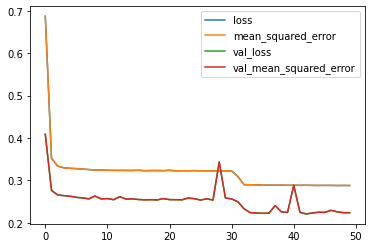

In [18]:
auto_encode_report=pd.DataFrame(report.history)
auto_encode_report.to_csv('auto_encode_report.csv')
auto_encode_report.plot()


In [19]:
for layer in model.layers:
  layer.trainable=False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 29)                870       
                                                                 
 dense_15 (Dense)            (None, 22)                660       
                                                                 
 dense_16 (Dense)            (None, 15)                345       
                                                                 
 dense_17 (Dense)            (None, 10)                160       
                                                                 
 dense_18 (Dense)            (None, 15)                165       
                                                                 
 dense_19 (Dense)            (None, 22)                352       
                                                                 
 dense_20 (Dense)            (None, 29)               

In [37]:
from sklearn.preprocessing import label_binarize
# lb = LabelBinarizer(sparse_output=True).fit(y_res)
t = label_binarize(y_res,classes=[0,1],neg_label=0, pos_label=1)
y_softmax = np.concatenate([t,np.logical_not(t)],axis=1)
y_softmax

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [38]:
from tensorflow.keras.activations import softmax
from tensorflow.keras.losses import CategoricalCrossentropy 
from tensorflow.keras.metrics import CategoricalAccuracy,Recall,Precision
final_model = Sequential(
    model.layers +
    [
        Dense(29,activation=relu),
        Dense(22,activation=relu),
        Dense(15,activation=relu),
        Dense(10,activation=relu),
        Dense(5,activation=relu),
        Dense(2,activation='softmax')
    ]
)

final_model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy(),Recall(),Precision()]
)

final_report = final_model.fit(x=X_res,
          y=y_softmax,
          batch_size=64,
          epochs=50,
          validation_split=0.2)

Epoch 1/50
5687/5687 [==============================] - 30s 5ms/step - loss: 0.0389 - categorical_accuracy: 0.9912 - recall_2: 0.9912 - precision_2: 0.9912 - val_loss: 0.0202 - val_categorical_accuracy: 0.9949 - val_recall_2: 0.9949 - val_precision_2: 0.9949
Epoch 2/50
5687/5687 [==============================] - 27s 5ms/step - loss: 0.0301 - categorical_accuracy: 0.9911 - recall_2: 0.9911 - precision_2: 0.9911 - val_loss: 0.0272 - val_categorical_accuracy: 0.9929 - val_recall_2: 0.9929 - val_precision_2: 0.9929
Epoch 3/50
5687/5687 [==============================] - 31s 5ms/step - loss: 0.0291 - categorical_accuracy: 0.9912 - recall_2: 0.9912 - precision_2: 0.9912 - val_loss: 0.0303 - val_categorical_accuracy: 0.9956 - val_recall_2: 0.9956 - val_precision_2: 0.9956
Epoch 4/50
5687/5687 [==============================] - 28s 5ms/step - loss: 0.0285 - categorical_accuracy: 0.9912 - recall_2: 0.9912 - precision_2: 0.9912 - val_loss: 0.0336 - val_categorical_accuracy: 0.9854 - val_recall_

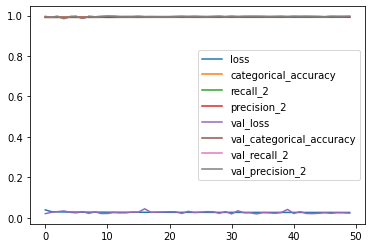

In [40]:
final_model.save('final_model')
final_report = pd.DataFrame(final_report.history)
final_report.to_csv('final_report.csv')


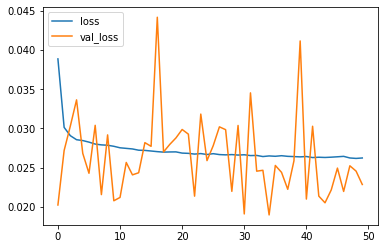

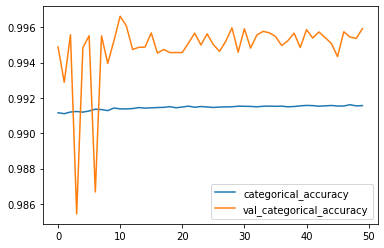

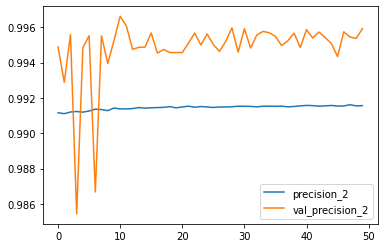

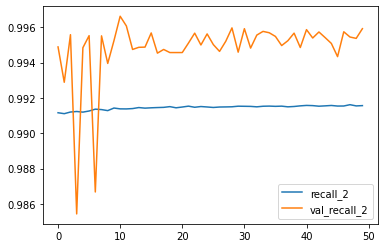

In [43]:
final_report.plot(y=['loss','val_loss'])
final_report.plot(y=['categorical_accuracy','val_categorical_accuracy'])
final_report.plot(y=['precision_2','val_precision_2'])
final_report.plot(y=['recall_2','val_recall_2'])

In [46]:
X_test['Amount']
X_test['Amount_normal'] = standard_scaler.transform(X_test['Amount'].to_numpy().reshape((-1,1)))
X_test.drop(columns=['Amount'],inplace=True)
            
y_pred = final_model.predict(X_test)



1781/1781 [==============================] - 3s 2ms/step


In [54]:
X_test.mean()

V1              -0.011720
V2               0.003508
V3               0.005881
V4              -0.004524
V5               0.006858
V6               0.004139
V7               0.001644
V8               0.005440
V9               0.000074
V10             -0.005986
V11              0.002927
V12              0.003958
V13             -0.003264
V14             -0.003967
V15             -0.002431
V16              0.000523
V17             -0.002629
V18              0.002940
V19             -0.001246
V20             -0.007101
V21             -0.001065
V22             -0.001201
V23              0.001104
V24             -0.002750
V25             -0.000767
V26              0.002337
V27              0.002295
V28              0.000541
Amount_normal   -0.005656
dtype: float64

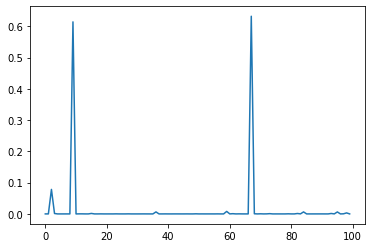

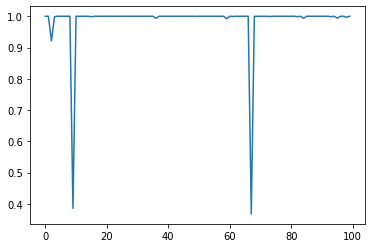

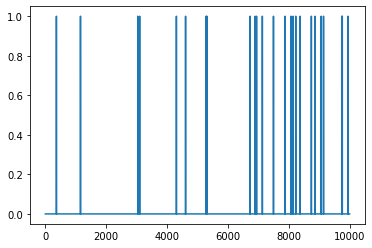

In [64]:
# from sklearn.metrics import confusion_matrix
# plt.plot(y_pred[:100,0])
# plt.show()
# plt.plot(y_pred[:100,1])
# plt.show()
# plt.plot(y_test[:10000])
# plt.show()
# y_pred_label = np.logical_not(np.argmax(y_pred,axis=1))
# cm = confusion_matrix(y_test,y_pred_label)
# sns.heatmap(cm,cbar=False,annot=True)